In [9]:
import nest_asyncio
import threading
from fastapi import FastAPI
from fastapi.responses import JSONResponse
import uvicorn

In [10]:
nest_asyncio.apply()

dados_ameacas = {
    "nodes": [
        {"data": {"id": "192.168.0.1", "label": "IP Malicioso"}},
        {"data": {"id": "Trojan", "label": "Trojan"}},
        {"data": {"id": "CVE-2023-1111", "label": "CVE Exploit"}}
    ],
    "edges": [
        {"data": {"source": "192.168.0.1", "target": "Trojan"}},
        {"data": {"source": "Trojan", "target": "CVE-2023-1111"}}
    ]
}

app = FastAPI()

@app.get("/ameacas")
def get_ameacas():
    return JSONResponse(content=dados_ameacas)

def iniciar_api():
    uvicorn.run(app, host="127.0.0.1", port=8000)

threading.Thread(target=iniciar_api, daemon=True).start()

INFO:     Started server process [156518]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:55424 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:55424 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:33856 - "GET /ameacas HTTP/1.1" 200 OK
INFO:     127.0.0.1:55874 - "GET /ameacas HTTP/1.1" 200 OK
INFO:     127.0.0.1:54368 - "GET /ameacas HTTP/1.1" 200 OK
INFO:     127.0.0.1:43140 - "GET /ameacas HTTP/1.1" 200 OK
INFO:     127.0.0.1:43140 - "GET /favicon.ico HTTP/1.1" 404 Not Found


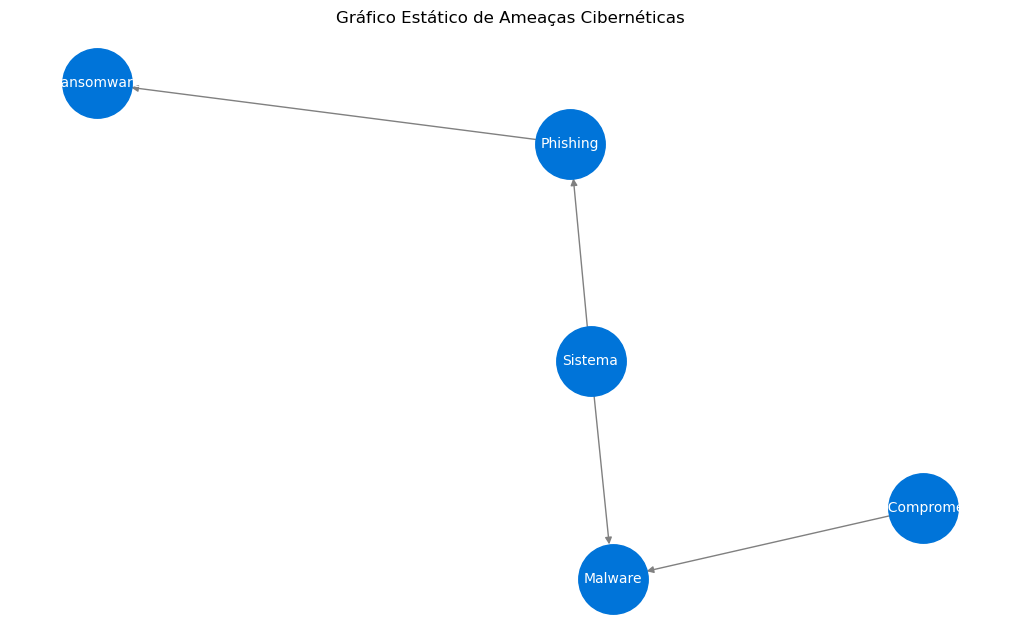

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Criar o grafo
G = nx.DiGraph()

# Nós (entidades)
G.add_node("Sistema")
G.add_node("Phishing")
G.add_node("Malware")
G.add_node("Ransomware")
G.add_node("VPN Comprometida")

# Conexões (ameaças)
G.add_edges_from([
    ("Sistema", "Phishing"),
    ("Sistema", "Malware"),
    ("Phishing", "Ransomware"),
    ("VPN Comprometida", "Malware")
])

# Layout e visualização
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="#0074D9", font_color='white',
        node_size=2500, font_size=10, edge_color='gray', arrows=True)

plt.title("Gráfico Estático de Ameaças Cibernéticas")
plt.axis('off')
plt.show()
